In [1]:
import pandas as pd # importar pandas
import numpy as np
import matplotlib.pyplot as plt


###Comenzamos con la base de datos en crudo, para posteriormente hacer una limpieza de los datos.
###Recordemos que la base de datos la obtuvimos a partir del (EM-DAT) The International Disaster Data Base.

#### Preguntas que buscamos resolver
Frecuencia e impacto
    • ¿Qué tipos de desastres son los más frecuentes en el mundo?
    • ¿Qué desastres causan más muertes?
    • ¿Qué desastres generan mayores pérdidas económicas?
Vulnerabilidad por países
    • ¿Qué países sufren más desastres?
    • ¿Qué regiones requieren mayor presupuesto de ayuda?
Respuesta internacional
    • ¿Qué países reciben más ayuda internacional?
    • ¿Qué países tienen los menores tiempos de respuesta?
    • ¿Qué tan eficiente es la ayuda enviada?
Análisis relacional
    • ¿Qué relación existe entre la severidad y la mortalidad?
    • ¿El tiempo de respuesta influye en el número de fallecidos?
    • ¿La ayuda económica acelera la recuperación?

In [2]:
df_raw = pd.read_excel("public_emdat_2025-12-09.xlsx") # leer el archivo Excel

df_raw.head()



,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,56.446576,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,NaN,2004-10-27,2023-09-25
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,18217.0,54.895152,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25


###Osevamos los nombres de las 46 columnas que posteriormente podrémos utilizar para el análisis de datos.


In [3]:
df_raw.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     16598 non-null  object 
 1   Historic                                   16598 non-null  object 
 2   Classification Key                         16598 non-null  object 
 3   Disaster Group                             16598 non-null  object 
 4   Disaster Subgroup                          16598 non-null  object 
 5   Disaster Type                              16598 non-null  object 
 6   Disaster Subtype                           16598 non-null  object 
 7   External IDs                               4285 non-null   object 
 8   Event Name                                 5242 non-null   object 
 9   ISO                                        16598 non-null  object 
 10  Country               

###También observamos que los desastres se dividen en Neturales y Tecnológicos, y decidimos enfocarnos más en los desastres Naturales y eliminar los tecnológicos y extraemos las primeras 5 filas.

In [5]:
df_naturales = df_raw[df_raw["Disaster Group"] == "Natural"].copy()

In [6]:
df_naturales.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,56.446576,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,18217.0,54.895152,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25
5,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":575,""adm1_name"":""Barisal""},{""adm...",2003-07-01,2023-09-25


In [7]:
df_naturales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10589 entries, 0 to 16597
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     10589 non-null  object 
 1   Historic                                   10589 non-null  object 
 2   Classification Key                         10589 non-null  object 
 3   Disaster Group                             10589 non-null  object 
 4   Disaster Subgroup                          10589 non-null  object 
 5   Disaster Type                              10589 non-null  object 
 6   Disaster Subtype                           10589 non-null  object 
 7   External IDs                               4196 non-null   object 
 8   Event Name                                 2617 non-null   object 
 9   ISO                                        10589 non-null  object 
 10  Country                    

### Revisamos si hay duplicados, pero como la base viene de un repositorio oficial muy serio, nos damos cuenta en que no los hay.


In [8]:
df_naturales["DisNo."].duplicated().sum()

np.int64(0)

### A partir de las 46 columnas de la bases de datos decidimos eliminar columnas que no van a ser utiles en el Análisis de datos.

In [9]:
columnas_a_quitar = ["Historic","Classification Key", "External IDs", "Disaster Group","Event Name","ISO","Origin","Associated Types","OFDA/BHA Response","Declaration","Appeal","River Basin","Start Day","End Year","End Month","End Day","No. Injured","No. Affected","No. Homeless","Reconstruction Costs ('000 US$)","Reconstruction Costs, Adjusted ('000 US$)","Insured Damage ('000 US$)","Insured Damage, Adjusted ('000 US$)","CPI","Admin Units","Entry Date","Last Update"]
df_naturales.drop(columns=columnas_a_quitar, inplace=True) # eliminamos columnas que no usaremos
df_naturales.info() # revisamos nuevamente la información del DataFrame
df_naturales.columns # revisamos los nombres de las columnas restantes

<class 'pandas.core.frame.DataFrame'>
Index: 10589 entries, 0 to 16597
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DisNo.                             10589 non-null  object 
 1   Disaster Subgroup                  10589 non-null  object 
 2   Disaster Type                      10589 non-null  object 
 3   Disaster Subtype                   10589 non-null  object 
 4   Country                            10589 non-null  object 
 5   Subregion                          10589 non-null  object 
 6   Region                             10589 non-null  object 
 7   Location                           10110 non-null  object 
 8   AID Contribution ('000 US$)        480 non-null    float64
 9   Magnitude                          3362 non-null   float64
 10  Magnitude Scale                    9482 non-null   object 
 11  Latitude                           1844 non-null   float64


Index(['DisNo.', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'Country', 'Subregion', 'Region', 'Location',
       'AID Contribution ('000 US$)', 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Total Deaths',
       'Total Affected', 'Total Damage ('000 US$)',
       'Total Damage, Adjusted ('000 US$)'],
      dtype='object')

### Guardamos el dataframe limpio como CSV, para uso futuro


In [10]:
df_naturales.to_csv("desastres_naturales_clean.csv", index=False)


### Iniciar rapidamente un análisis exploratorio de los paises con más desastres naturales y obtenemos que China , USA y la India son los paises con mayor cantidad de desastres naturales.  


In [11]:
# iniciar rapidamente un análisis exploratorio de los paises con más desastres naturales
desastres_por_pais = df_naturales["Country"].value_counts() # value_counts para contar ocurrencias por evento
top_15_paises = desastres_por_pais.head(15) # head para obtener los 15 primeros
print(top_15_paises)

Country
China                               667
United States of America            635
India                               427
Indonesia                           414
Philippines                         396
Viet Nam                            203
Japan                               181
Afghanistan                         174
Pakistan                            170
Mexico                              167
Brazil                              166
Bangladesh                          156
Colombia                            139
Democratic Republic of the Congo    137
Thailand                            135
Name: count, dtype: int64


### Consideramos descartar los países que no tengan como menos 20 desastres naturales.
### Obtenemos como resultado que de los 227 paises originales solo 121 tienen al menos 20 desastres registrados y realizamos una grafica.


In [12]:
paises_confiables= desastres_por_pais[desastres_por_pais >= 20].index.tolist()

print(len(paises_confiables))

121


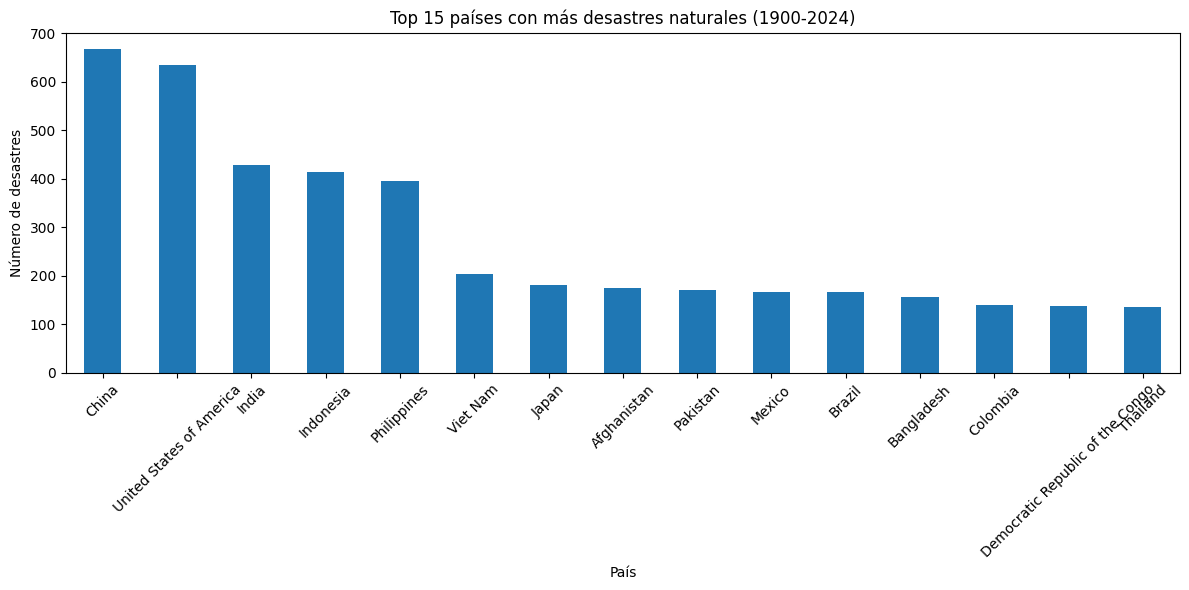

In [13]:
# Gráfica de desastres por pais
plt.figure(figsize=(12,6)) # ajustar tamaño de la figura 12 de ancho por 6 de alto
top_15_paises.plot(kind='bar') 
plt.title("Top 15 países con más desastres naturales (1900-2024)")
plt.xlabel("País")
plt.ylabel("Número de desastres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sumamos el numero de desastre por tipo.
### EN la grafica podemos observar que son màs comunes las hinundaciones.
### Existen al rededor de 4000 hinundaciones en nuestra base de datos.

In [14]:
df_naturales
stats_por_tipo = (
    df_naturales
    .groupby("Disaster Type")
    .agg(
        num_eventos = ("DisNo.", "nunique"),         # cuántos desastres únicos
        filas_registro = ("Disaster Type", "size"),  # cuántas filas (por si un desastre se repite)
        muertes_totales = ("Total Deaths", "sum"),
        muertes_promedio = ("Total Deaths", "mean"),
        danio_total_kusd = ("Total Damage, Adjusted ('000 US$)", "sum"),
        danio_promedio_kusd = ("Total Damage, Adjusted ('000 US$)", "mean"),
    )
    .sort_values("num_eventos", ascending=False)
)

stats_por_tipo

,num_eventos,filas_registro,muertes_totales,muertes_promedio,danio_total_kusd,danio_promedio_kusd
Disaster Type,,,,,,
Flood,4221,4221,139983.0,45.272639,1.050640e+09,8.858688e+05
Storm,2790,2790,226756.0,108.547630,2.405244e+09,1.788286e+06
Epidemic,887,887,123946.0,161.598435,0.000000e+00,NaN
Earthquake,693,693,796216.0,1753.779736,9.466594e+08,3.155531e+06
Extreme temperature,568,568,352756.0,741.084034,7.483544e+07,1.663010e+06
Mass movement (wet),493,493,22404.0,46.870293,7.527191e+06,1.420225e+05
Drought,420,420,24197.0,864.178571,2.616788e+08,2.217617e+06
Wildfire,332,332,2298.0,13.927273,1.516694e+08,1.184917e+06
Volcanic activity,132,132,1744.0,69.760000,4.316779e+06,2.158390e+05


### 1. ¿Qué tipos de desastres son los más frecuentes en el mundo?
#### Podemos observar que las inundaciones son de todos el desastre más frecuente.

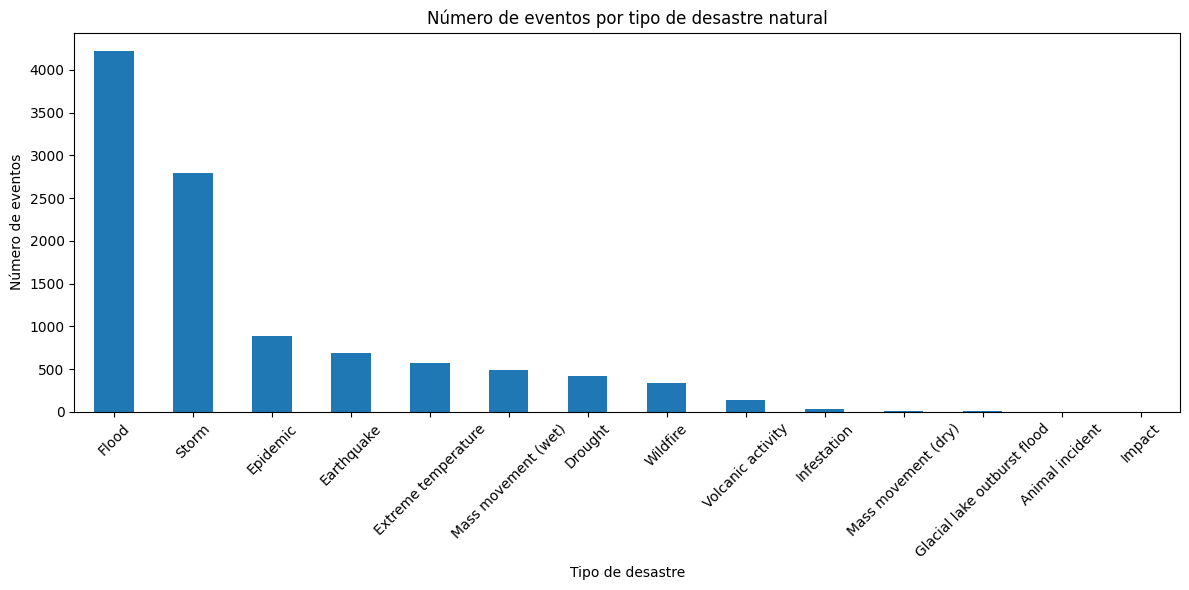

In [15]:
stats_por_tipo.to_csv("estadisticas_desastres_por_tipo.csv")
#graficar stats por tipo de desastre
plt.figure(figsize=(12,6))
stats_por_tipo["num_eventos"].plot(kind='bar')
plt.title("Número de eventos por tipo de desastre natural")
plt.xlabel("Tipo de desastre")
plt.ylabel("Número de eventos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.¿Qué desastres causan más muertes?
#### 3 ¿Qué desastres generan mayores pérdidas económicas?

In [28]:
tabla_muertes = (
    df_naturales.groupby("Disaster Subtype")
    .agg(
        muertes_totales=("Total Deaths", "sum"),
        afectados_totales=("Total Affected", "sum"),
    )
    .reset_index()
)
tabla_muertes.head

<bound method NDFrame.head of                     Disaster Subtype  muertes_totales  afectados_totales
0                    Animal incident             12.0       5.000000e+00
1                           Ash fall            663.0       3.210846e+06
2                    Avalanche (dry)             16.0       0.000000e+00
3                    Avalanche (wet)           1889.0       4.769600e+04
4                  Bacterial disease          68946.0       4.003170e+06
5              Blizzard/Winter storm           2911.0       1.145356e+08
6                      Coastal flood            604.0       1.040663e+07
7                          Cold wave          11399.0       1.792630e+07
8                          Collision              0.0       3.014910e+05
9                            Derecho             24.0       6.456000e+03
10                           Drought          24197.0       1.711449e+09
11              Extra-tropical storm            446.0       4.243652e+06
12                   

### Extraemos sólo las inundaciones 

In [29]:
df_inundaciones = df_naturales[df_naturales["Disaster Type"] == "FLood"].copy()
df_inundaciones.head()

,DisNo.,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Subregion,Region,Location,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)"


In [ ]:
"""tabla_inundaciones = (
    df_inundaciones.groupby("Disaster Subtype")
    .agg(
        muertes_totales=("Total Deaths", "sum"),
        afectados_totales=("Total Affected", "sum"),
    )
    .reset_index()
)
tabla_inundaciones
"""

NameError: name 'df_inundaciones' is not defined

### Extraemos sólo las tormentas.

In [ ]:
df_tormenta = df_naturales[df_naturales["Disaster Type"] == "Storm"].copy()
df_tormenta.head()

,DisNo.,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Subregion,Region,Location,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)"
11,2000-0009-IRN,Meteorological,Storm,Storm (General),Iran (Islamic Republic of),Southern Asia,Asia,Gilan province,NaN,120.0,Kph,NaN,NaN,2000,1.0,3.0,5500.0,NaN,NaN
22,2000-0021-USA,Meteorological,Storm,Tornado,United States of America,Northern America,Americas,"Crittenden, Daviess, Webster districts (Kentuc...",NaN,NaN,Kph,NaN,NaN,2000,1.0,1.0,162.0,210000.0,382547.0
28,2000-0028-ROU,Meteorological,Storm,Blizzard/Winter storm,Romania,Eastern Europe,Europe,"Bihor, Satu Mare, Cluj, Salaj, Mures provinces",NaN,NaN,Kph,NaN,NaN,2000,1.0,14.0,300.0,NaN,NaN
37,2000-0037-REU,Meteorological,Storm,Tropical cyclone,Réunion,Sub-Saharan Africa,Africa,"Arrondissement du vent, Arrondissement sous le...",NaN,153.0,Kph,NaN,NaN,2000,1.0,2.0,600.0,NaN,NaN
49,2000-0050-MNG,Meteorological,Storm,Storm (General),Mongolia,Eastern Asia,Asia,"Bayanxongor, O'mnogovi, Xo'vsgol, Zavxan, O'vo...",19916.0,NaN,Kph,NaN,NaN,2000,1.0,4.0,500000.0,80000.0,145732.0


### Extraemos sólo los Terremotos.

In [ ]:
df_terremotos = df_naturales[df_naturales["Disaster Type"] == "Earthquake"].copy()
df_terremotos.head()

,DisNo.,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Subregion,Region,Location,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)"
23,2000-0023-BGD,Geophysical,Earthquake,Ground movement,Bangladesh,Southern Asia,Asia,"Maheshkhali area (Cox's Bazar district, Chitta...",NaN,4.3,Moment Magnitude,21.431,91.762,2000,1.0,NaN,1000.0,NaN,NaN
33,2000-0033-CHN,Geophysical,Earthquake,Ground movement,China,Eastern Asia,Asia,"Yongren Xian, Yao'an Xian, Nanhua Xian, Dayao ...",765.0,5.9,Moment Magnitude,25.607,101.063,2000,1.0,7.0,1855007.0,73500.0,133892.0
36,2000-0036-CHN,Geophysical,Earthquake,Ground movement,China,Eastern Asia,Asia,"Mile Xian area (Honghe Hani and Yi district, Y...",NaN,4.9,Moment Magnitude,24.263,103.797,2000,1.0,1.0,10302.0,483.0,880.0
41,2000-0041-CHN,Geophysical,Earthquake,Ground movement,China,Eastern Asia,Asia,"Xiuyan Manzu Zizhixian area (Anshan district, ...",NaN,5.1,Moment Magnitude,40.498,122.994,2000,1.0,NaN,62030.0,NaN,NaN
50,2000-0051-IRN,Geophysical,Earthquake,Ground movement,Iran (Islamic Republic of),Southern Asia,Asia,"Kashmar, Bardeskan districts (Khorasan)",NaN,5.3,Moment Magnitude,35.288,58.218,2000,2.0,1.0,2015.0,NaN,NaN


### Extraemos el numero de sismos por año del año 2000 al 2025

In [ ]:
sismos_por_anios = df_terremotos["Start Year"].value_counts().sort_index()
sismos_por_anios

Start Year
2000    29
2001    24
2002    37
2003    38
2004    42
2005    25
2006    24
2007    21
2008    22
2009    22
2010    22
2011    30
2012    27
2013    29
2014    25
2015    23
2016    30
2017    22
2018    20
2019    31
2020    16
2021    28
2022    31
2023    32
2024    14
2025    29
Name: count, dtype: int64

In [ ]:
tabla_terremotos = (
    df_inundaciones.groupby("Disaster Subtype")
    .agg(
        muertes_totales=("Total Deaths", "sum"),
        afectados_totales=("Total Affected", "sum"),
    )
    .reset_index()
)
tabla_terremotos

,Disaster Subtype,muertes_totales,afectados_totales


In [ ]:
#tabla_terremotos

,Disaster Subtype,muertes_totales,afectados_totales


### Extraemos sólo los Huracanes 

In [ ]:
df_huracanes = df_naturales[df_naturales["Disaster Type"] == "Storm"].copy()
df_huracanes.head()

,DisNo.,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Subregion,Region,Location,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)"
11,2000-0009-IRN,Meteorological,Storm,Storm (General),Iran (Islamic Republic of),Southern Asia,Asia,Gilan province,NaN,120.0,Kph,NaN,NaN,2000,1.0,3.0,5500.0,NaN,NaN
22,2000-0021-USA,Meteorological,Storm,Tornado,United States of America,Northern America,Americas,"Crittenden, Daviess, Webster districts (Kentuc...",NaN,NaN,Kph,NaN,NaN,2000,1.0,1.0,162.0,210000.0,382547.0
28,2000-0028-ROU,Meteorological,Storm,Blizzard/Winter storm,Romania,Eastern Europe,Europe,"Bihor, Satu Mare, Cluj, Salaj, Mures provinces",NaN,NaN,Kph,NaN,NaN,2000,1.0,14.0,300.0,NaN,NaN
37,2000-0037-REU,Meteorological,Storm,Tropical cyclone,Réunion,Sub-Saharan Africa,Africa,"Arrondissement du vent, Arrondissement sous le...",NaN,153.0,Kph,NaN,NaN,2000,1.0,2.0,600.0,NaN,NaN
49,2000-0050-MNG,Meteorological,Storm,Storm (General),Mongolia,Eastern Asia,Asia,"Bayanxongor, O'mnogovi, Xo'vsgol, Zavxan, O'vo...",19916.0,NaN,Kph,NaN,NaN,2000,1.0,4.0,500000.0,80000.0,145732.0


### Extraemos sólo las pandemias.

In [ ]:
df_pandemias = df_naturales[df_naturales["Disaster Type"] == "Epidemic"].copy()
df_pandemias.head()

,DisNo.,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Subregion,Region,Location,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)"
51,2000-0052-RUS,Biological,Epidemic,Viral disease,Russian Federation,Eastern Europe,Europe,Tatarstan,NaN,NaN,Vaccinated,NaN,NaN,2000,1.0,NaN,564.0,NaN,NaN
52,2000-0053-COG,Biological,Epidemic,Viral disease,Congo,Sub-Saharan Africa,Africa,Lekana District,NaN,NaN,Vaccinated,NaN,NaN,2000,1.0,24.0,NaN,NaN,NaN
53,2000-0054-AFG,Biological,Epidemic,Viral disease,Afghanistan,Southern Asia,Asia,"Darra Souf, Jaghuri, Zindajan, Ghorian Distric...",NaN,NaN,Vaccinated,NaN,NaN,2000,1.0,507.0,NaN,NaN,NaN
54,2000-0055-ETH,Biological,Epidemic,Infectious disease (General),Ethiopia,Sub-Saharan Africa,Africa,"Deghabour, Feik",NaN,NaN,Vaccinated,NaN,NaN,2000,1.0,27.0,100.0,NaN,NaN
55,2000-0056-TZA,Biological,Epidemic,Bacterial disease,United Republic of Tanzania,Sub-Saharan Africa,Africa,Mtwara region,NaN,NaN,NaN,NaN,NaN,2000,1.0,16.0,254.0,NaN,NaN


### Extraemos los subtipos de pandemias las cuales son Bacterianas, de Parásicas, Infexiosas y Virales.

### Para posterirmente saber cuales son las pandemias más mortales

In [ ]:
tipo_pandemia=df_pandemias["Disaster Subtype"].unique() 
tipo_pandemia

array(['Viral disease', 'Infectious disease (General)',
       'Bacterial disease', 'Parasitic disease'], dtype=object)

### Obtenemos las muertes totales y el total de afectados a causa de pandemias.

### Las enfermedades que se pueden expandir como una pandemia  se clasifican según su agente causal:
#### Bacterianas (tuberculosis, cólera), Infecciosas, Virales (gripe, COVID-19, sarampión) y  Parasitarias (malaria, amebiasis).

In [ ]:
tabla_pandemias = (
    df_pandemias.groupby("Disaster Subtype")
    .agg(
        muertes_totales=("Total Deaths", "sum"),
        afectados_totales=("Total Affected", "sum"),
    )
    .reset_index()
)
tabla_pandemias

,Disaster Subtype,muertes_totales,afectados_totales
0,Bacterial disease,68946.0,4003170.0
1,Infectious disease (General),6313.0,186984.0
2,Parasitic disease,750.0,1143641.0
3,Viral disease,47937.0,7326641.0


In [ ]:
# Gráfica por tipo de pandemia 
"""
plt.figure(figsize=(10,5))
tipo_pandemia(kind='bar') 
plt.title("Tipos de enfermedades")
plt.xlabel("Pandemias")
plt.ylabel("Tipo de enfermedades ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
"""

'\nplt.figure(figsize=(10,5))\ntipo_pandemia(kind=\'bar\') \nplt.title("Tipos de enfermedades")\nplt.xlabel("Pandemias")\nplt.ylabel("Tipo de enfermedades ")\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n'